In [2]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [3]:
# import data into dataframe form
import pandas as pd
data=pd.read_csv('Reviews.csv')

In [3]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#!pip3 install --user wordcloud

# basic visualization : word cloud, tnse plot

In [5]:
# define function to draw word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = "Word Cloud"):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    

In [3]:
### Ignore capitalization and remove punctuation in text
punctuation = set(string.punctuation)
cleant=[]
for d in data['Text']:
    r = ''.join([c for c in d.lower() if not c in punctuation])
    cleant.append(r)
data['Text']=cleant

In [4]:
### Ignore capitalization and remove punctuation in summary
punctuation = set(string.punctuation)
cleans=[]
for d in data['Summary']:
    r = ''.join([c for c in str(d).lower() if not c in punctuation])
    cleans.append(r)
data['Summary']=cleans

In [37]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,helpfulness_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,positive,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,negetive,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says it all,this is a confection that has been around a fe...,positive,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,negetive,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price there was a wide...,positive,NaN


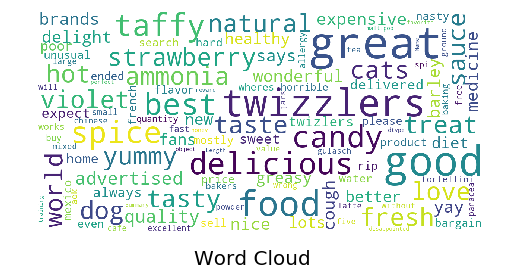

In [9]:
# show word cloud for summary
show_wordcloud(data["Summary"])

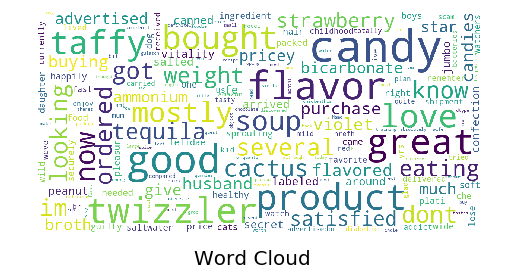

In [10]:
# show word cloud for text
show_wordcloud(data["Text"])

In [45]:
# using score to judge sentiment
sentiment=[]
for i in range(0,len(data)):
    if data['Score'][i]>3:
        sentiment.append('positive')
    elif data['Score'][i]<3:
        sentiment.append('negetive')
    else:
        sentiment.append('neutral')

In [46]:
# add sentiment column to dataframe
data['sentiment']=sentiment

In [47]:
data.tail(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,will not do without,great for sesame chickenthis is a good if not ...,positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,im disappointed with the flavor the chocolate ...,negetive
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,perfect for our maltipoo,these stars are small so you can give 1015 of ...,positive
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,favorite training and reward treat,these are the best treats for training and rew...,positive
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,great honey,i am very satisfied product is as advertised i...,positive


In [48]:
data_positive=data[data['sentiment']=='positive']
data_negetive=data[data['sentiment']=='negetive']

In [49]:
data_positive=data_positive.sample(500)
data_negetive=data_negetive.sample(500)

In [50]:
reviews=[]
for l in data_positive["Text"]:
    reviews.append(l)
for l in data_negetive["Text"]:
    reviews.append(l)

In [51]:
len(reviews)

1000

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(reviews)

In [53]:
# Standardization 
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
std_data = std.fit_transform(final_tf_idf)

In [54]:
std_data

<1000x51508 sparse matrix of type '<class 'numpy.float64'>'
	with 127003 stored elements in Compressed Sparse Row format>

In [55]:
# Converting sparse matrix to dense because tnse takes dense vector
std_data = std_data.todense()

In [57]:
std_data

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
data_new=data_positive.append(data_negetive, ignore_index=True)
final_sentiment=data_new["sentiment"]
final_sentiment.shape

(1000,)

In [28]:
final_sentiment[:5]

0    positive
1    positive
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


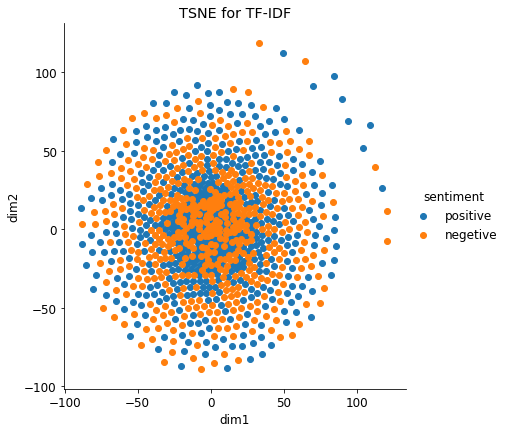

In [30]:
## TSNE plot
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 500)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, final_sentiment)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "sentiment"))

# Ploting the result of tsne
import seaborn as sns
sns.FacetGrid(tsne_df, hue="sentiment", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for TF-IDF")
plt.show()

In [ ]:
# select 1000 observations form the whole data and plot

In [58]:
data1000=data.sample(1000)
reviews1=[]
for l in data1000["Text"]:
    reviews1.append(l)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(reviews1)

In [60]:
# Standardization 
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
std_data = std.fit_transform(final_tf_idf)

In [61]:
# Converting sparse matrix to dense because tnse takes dense vector
std_data = std_data.todense()

In [62]:
std_data.shape

(1000, 51554)

In [46]:
final_sentiment=data1000["sentiment"]
final_sentiment.shape

(1000,)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


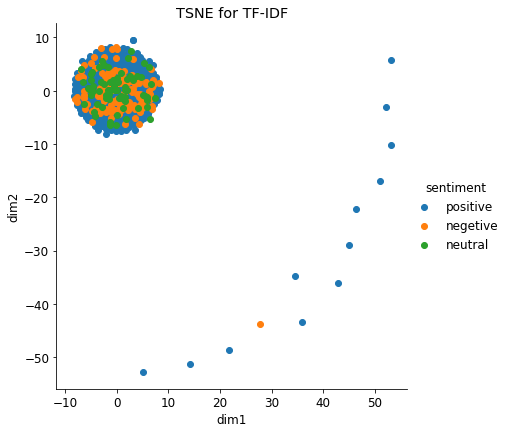

In [47]:
## TSNE plot
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 500)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, final_sentiment)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "sentiment"))

# Ploting the result of tsne
import seaborn as sns
sns.FacetGrid(tsne_df, hue="sentiment", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for TF-IDF")
plt.show()

In [ ]:
#reviews_no = data["Text"][data["Text"].sentiment != "Neutral"]

In [7]:
len(np.unique(data['UserId']))

256059

In [6]:
len(data)

568454

# tfidf rating prediction

In [ ]:
# using 'Summary'
review_sum=[]
for d in data['Summary']:
    review_sum.append(d)
review_train_sum=review_sum[:180000]
review_valid_sum=review_sum[180000:360000]
review_test_sum=review_sum[360000:540000]

In [5]:
# using 'Text'
review_text=[]
for d in data['Text']:
    review_text.append(d)
review_train_text=review_text[:180000]
review_valid_text=review_text[180000:360000]
review_test_text=review_text[360000:540000]

In [159]:
# define function to get x
def feat(review,words):
    cvect = CountVectorizer(ngram_range=(1,1))
    counts = cvect.fit_transform(review)
    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(ngram_range=(1,1),smooth_idf=False)
    tfs = tfidf.fit_transform(review)
    new_tfs = normalized_counts.multiply(tfidf.idf_)

    feature_names = tfidf.get_feature_names()
    df = pd.DataFrame(new_tfs.T.todense(),index=feature_names)


    exist_valid=[]
    for i in feature_names:
        if i in words:
            exist_valid.append(i)
        
    df_get=df.loc[exist_valid]        

    x=[]
    for i in range(0,180000):
        m=df_get[i].tolist()
        x.append(m)
    
    return x

In [160]:
# wordlist using normal words (Summary)
from collections import defaultdict
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in review_train_sum:
    for w in d.split():
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words_sum = [x[1] for x in counts[:1000]]

In [9]:
# wordlist using normal words (Text)
from collections import defaultdict
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in review_train_text:
    for w in d.split():
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words_text = [x[1] for x in counts[:1000]]

In [176]:
# wordlist using non-stop words (Summary)
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import string
from collections import defaultdict

wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in review_train_sum:
    for w in d.split():
        if w not in stopwords:
            wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words_sum_nostop = [x[1] for x in counts[:1000]]

In [177]:
# wordlist using nonstop words (Text)
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in review_train_text:
    for w in d.split():
        if w not in stopwords:
            wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words_text_nostop = [x[1] for x in counts[:1000]]

In [6]:
# calculate y_train, y_valid
y = list(data['Score'])
y_train=y[:180000]
y_valid=y[180000:360000]
y_test=y[360000:540000]

In [12]:
# define function to get MSE
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
def mse(x_train, y_train,x_valid,y_valid):
    clf = linear_model.Ridge(1.0, fit_intercept=False)
    clf.fit(x_train, y_train)
    theta = clf.coef_
    predictions = clf.predict(x_valid)
    mse=mean_squared_error(y_valid,predictions)
    return mse

In [171]:
# model 1 Summary  normal words
x_train=feat(review_train_sum,words_sum)
x_valid=feat(review_valid_sum,words_sum)
mse1=mse(x_train, y_train,x_valid,y_valid)

In [172]:
mse1

2.435796086991387

In [173]:
# model 2 Text  normal words
x_train=feat(review_train_text,words_text)
x_valid=feat(review_valid_text,words_text)
mse2=mse(x_train, y_train,x_valid,y_valid)

In [174]:
mse2

1.1324572579469123

In [178]:
# model 3 summary nonstop words
x_train=feat(review_train_sum,words_sum_nostop)
x_valid=feat(review_valid_sum,words_sum_nostop)
mse3=mse(x_train, y_train,x_valid,y_valid)

In [179]:
mse3

3.495618602431877

In [180]:
# model 4 text nonstop words
x_train=feat(review_train_text,words_text_nostop)
x_valid=feat(review_valid_text,words_text_nostop)
mse4=mse(x_train, y_train,x_valid,y_valid)

In [181]:
mse4

1.5930396198842791

# new method using all the words

In [144]:
# model 5 using "Text"  all the words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review_train)
X_valid=vectorizer.transform(review_valid)

from sklearn import linear_model
clf = linear_model.Ridge(1.0, fit_intercept=False)
clf.fit(X, y_train)
theta = clf.coef_
predictions = clf.predict(X_valid)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, predictions)

1.3836681185889843

In [146]:
# compare different model and get the best one
lambda_try = [0.01, 0.1, 1, 10, 100]
for i in lambda_try:
    clf = linear_model.Ridge(i, fit_intercept=False)
    clf.fit(X, y_train)
    theta = clf.coef_
    predictions = clf.predict(X_valid)
    print(mean_squared_error(y_valid,predictions))

1.5614476788730998
1.4129421748286264
1.3836681185889843
1.536994353223153
1.9052538311388825


In [156]:
# model 6 using 'Summary' all the words
review_sum=[]
for d in data['Summary']:
    review_sum.append(d)
review_train_sum=review_sum[:180000]
review_valid_sum=review_sum[180000:360000]
review_test_sum=review_sum[360000:540000]

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review_train_sum)
X_valid=vectorizer.transform(review_valid_sum)

from sklearn import linear_model
clf = linear_model.Ridge(1.0, fit_intercept=False)
clf.fit(X, y_train)
theta = clf.coef_
predictions = clf.predict(X_valid)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, predictions)

1.5240213750124731

In [185]:
# model 7 using "Text"  all the words bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(review_train_text)
X_valid=vectorizer.transform(review_valid_text)

from sklearn import linear_model
clf = linear_model.Ridge(1.0, fit_intercept=False)
clf.fit(X, y_train)
theta = clf.coef_
predictions = clf.predict(X_valid)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, predictions)

1.1739198850370065

In [186]:
# model 8 using "Text"  all the words trigrams
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(review_train_text)
X_valid=vectorizer.transform(review_valid_text)

from sklearn import linear_model
clf = linear_model.Ridge(1.0, fit_intercept=False)
clf.fit(X, y_train)
theta = clf.coef_
predictions = clf.predict(X_valid)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, predictions)

1.5884005689715643

In [183]:
# use test set to test our best model: text normal words
x_train=feat(review_train_text,words_text)
x_test=feat(review_test_text,words_text)
mse_test=mse(x_train,y_train,x_test,y_test)

In [184]:
mse_test

1.125276834839219

# Random Forest

In [16]:
datan=data.copy()

In [5]:
datan

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [17]:
import datetime
datan["Time1"] = datan["Time"].map(lambda t: datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))

In [18]:
import pandas as pd
#datan['Time'] = pd.to_datetime(datan['Time'] - pd.Timestamp(0).to_julian_date())
datan['Month'] = pd.DatetimeIndex(datan['Time1']).month
datan['day_of_week'] = pd.DatetimeIndex(datan['Time1']).dayofweek
datan['Year'] = pd.DatetimeIndex(datan['Time1']).year

In [8]:
datan

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time1,Month,day_of_week,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-26 17:00:00,4,1,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-06 17:00:00,9,3,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-17 17:00:00,8,6,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-12 17:00:00,6,6,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-20 17:00:00,10,5,2012
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,2012-07-11 17:00:00,7,2,2012
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,2012-06-19 17:00:00,6,1,2012
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,2012-05-02 17:00:00,5,2,2012
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,2011-11-22 16:00:00,11,1,2011
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,2012-10-25 17:00:00,10,3,2012


In [19]:
# define function to plot correlation between vairables
import matplotlib.pyplot as plt
def plot_corr(df,size=5):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Blues)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(50)    
    plt.show()

In [20]:
data_plot=datan[["HelpfulnessNumerator","HelpfulnessDenominator","Score","Month","day_of_week","Year"]]

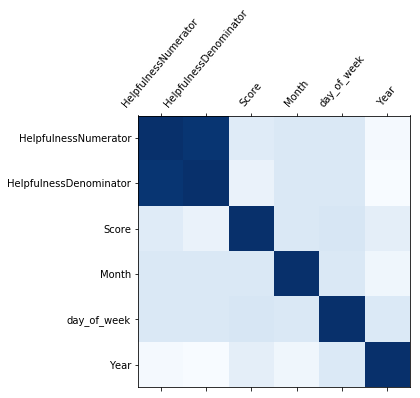

In [21]:
# no obivous correlation between available data
plot_corr(data_plot)

In [9]:
# random forest model
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske
X = datan.drop(['Id','ProductId','UserId','ProfileName','Score','Time1','Summary','Text'], axis=1).values
y = datan['Score'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6681541249113095


In [14]:
from sklearn.metrics import mean_squared_error
prediction=clf_rf.predict(X_test)
MSE = mean_squared_error(y_test,prediction)

In [15]:
MSE

1.8487014548162568